Parte 3 do curso Machine Learning: Introdução a classificação com SKLearn da Alura

Transcrição das aulas do instrutor Guilherme Silveira

Nosso próximo projeto usará um novo arquivo de dados, que possui três colunas diferentes.

Cada linha possui um projeto diferente de site web, como o site de uma escola, de uma padaria e assim por diante. As pessoas interessadas em criar sites para seus respectivos negócios submetem o projeto a uma empresa e estipulam o número de horas para que o projeto seja criado (expected_hours) , bem como a quantia a ser paga (price).

A coluna unfinished mostra os projetos que foram finalizados (0) e os que não foram finalizados (1) - ou seja, se algum web designer pegou tal projeto, concordando com o prazo e o valor estipulados.

A ideia é, a partir do conjunto de dados fornecido, tentarmos prever qual projeto será finalizado ou não. Dessa forma, podemos oferecer mais informações para as pessoas que submetem os projetos à plataforma, de forma que elas adequem suas estimativas.

Trabalharemos com os dados puros, em formato .csv, como no projeto anterior. Para começar, criaremos um arquivo no Google Colab chamado Introduçao a Machine Learning 3.ipynb. Importaremos a biblioteca Pandas, leremos o arquivo .csv e imprimiremos os cinco primeiros itens por meio de head().

In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv"
dados = pd.read_csv(uri)
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [2]:
a_renomear = {
    'expected_hours' : 'horas_esperadas',
    'price' : 'preco',
    'unfinished' : 'nao_finalizado'
}
dados = dados.rename(columns = a_renomear)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


Contudo, a coluna nao_finalizado pode gerar confusões, afinal 0 seriam os projetos finalizados e 1 os não finalizados. Podemos organizar as nossas features com mais clareza de forma a evitar erros no desenvolvimento do projeto.

Criaremos uma nova coluna chamada finalizados, e trocaremos os valores 0 e 1, invertendo a função deles nesta coluna. Por fim, mapearemos essa troca de valores usando map(troca). 

In [3]:
troca = {
    0 : 1,
    1 : 0
}
dados['finalizado'] = dados.nao_finalizado.map(troca)
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


O que queremos agora é visualizar as informações de outra forma. No projeto anterior, havia três features e um y. Neste caso, temos duas features (horas_esperadas e preco) e a classificação (finalizado). Não usaremos a coluna nao_finalizado.

Com essas duas features, podemos desenhar em um eixo as horas_esperadas e em outro o preco. Para isso, usaremos uma famosa biblioteca do Python chamada Seaborn. Vamos importá-la como sns (que é a importação padrão), e plotaremos os pontos distribuídos por meio do scatterplot().

Para este método, precisamos passar o parâmetro referente às coluna x (horas_esperadas) e y (preco). Por fim, devemos passar os dados, de onde vem nosso dataframe do Pandas. 

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

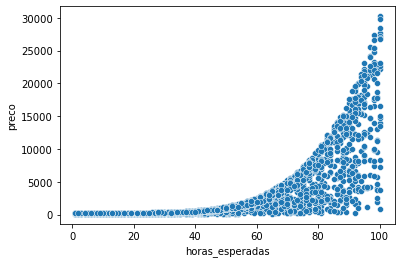

In [4]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

O que gostaríamos de avaliar agora não é apenas o número de horas esperadas e o preço, mas sim explorar mais quais são os projetos finalizados ou não.

Existem várias maneiras de tentarmos visualizar as duas classes (0 ou 1 para finalizado) no gráfico. Uma delas é por meio de cores. Utilizaremos a mesma estrutura do método scatterplot, mas dessa vez passando o parâmetro hue, que será baseado na coluna finalizado, pintando os pontos de acordo com a classe atribuída à essa coluna: 

<AxesSubplot:xlabel='horas_esperadas', ylabel='preco'>

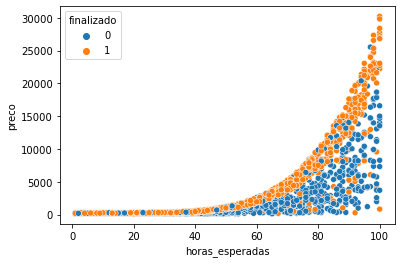

In [5]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="finalizado", data=dados)

Dessa forma, aprendemos que algumas informações podem ser visualizadas de forma mais clara apenas adicionando diferenças de cor. Uma outra alternativa é realizar uma plotagem relativa por meio de relplot(). Com esse método, ao invés das cores, queremos plotar os dados em colunas (col) diferentes, uma para os projetos finalizados e outra para os não-finalizados:

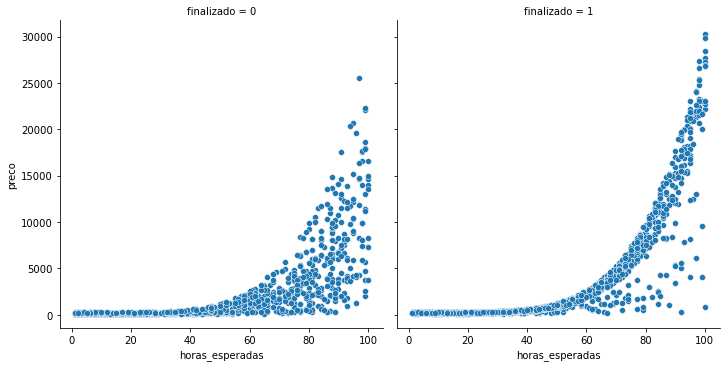

In [6]:
sns.relplot(x="horas_esperadas", y="preco", col="finalizado", data=dados)

Também é possível inserir cores em plotagens relativas, adicionando outro recurso visual para a organização dos dados. Para tanto, voltaremos a inserir o parâmetro hueno código: 

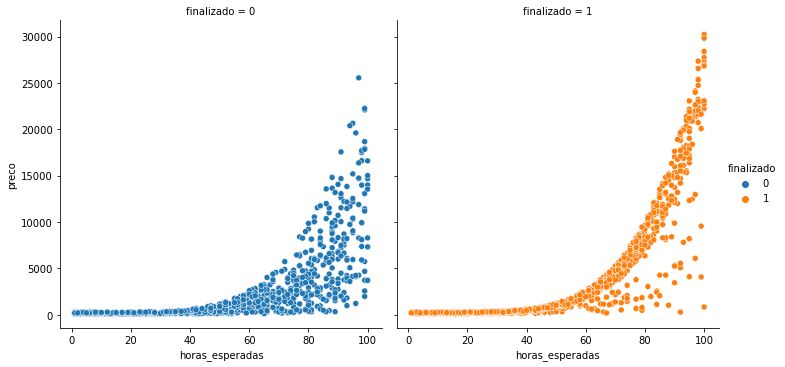

In [7]:
sns.relplot(x="horas_esperadas", y="preco", hue="finalizado", col="finalizado", data=dados)

Nosso próximo passo é realizar a modelagem. Primeiro, coletaremos nossos dados no eixo x, que são as colunas horas_esperadas e preco. Em seguida, o eixo y, referente à coluna finalizado.

In [8]:
x = dados[['horas_esperadas', 'preco']]
y = dados['finalizado']

Agora criaremos um modelo, separaremos os dados de treino e teste, treinaremos efetivamente o modelo e por fim verificaremos a taxa de acerto. Fizemos todos esses processos no projeto anterior, portanto podemos aproveitar a última versão do nosso código.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                         random_state = SEED, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(random_state = SEED, max_iter=100000)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 60.93%


C:\Users\Resource\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C:\Users\Resource\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
  
Tentamos com 1.000.000 e ainda não convergiu

Lembre-se que, quando estamos explorando possibilidades e realizando testes, é normal utilizarmos os notebooks dessa maneira. Porém, quando queremos colocar um projeto em produção, a prática é criar arquivos Python específicos, com os módulos que fazem sentido para aquela situação.

Vamos verificar rapidamente nosso código: estamos realizando o train_test_split() para dividir os dados de teste e de treino, com o tamanho de 0.25 (25%) para o teste; estratificando esses dados de acordo com as classes; criando nosso modelo LinearSVC; treinando esse modelo; prevendo os resultados e testando a acurácia do estimador.

Ao executamos nosso código, teremos o seguinte resultado:

    Treinaremos com 1617 elementos e testaremos com 540 elementos

    A acurácia foi 60.93%

A acurácia não parece ser boa, mas essa é a base de um algoritmo para tentar prever resultados. Mas devemos nos perguntar: como saber se 61% é de fato ruim?

Para obtermos uma resposta satisfatória, precisamos de um recurso comparativo. Portanto, inventaremos um algoritmo bem simples que terá como previsão que todos os projetos são finalizados, isto é, os 540 elementos de teste serão 1.

Com o Numpy, a biblioteca que gera matrizes, faremos com que 540 elementos tenham o valor 1. Feito isso, estipularemos que essas são as previsões, as chamaremos de previsoes_do_willian, e testaremos sua acurácia. 

In [22]:
import numpy as np
previsoes_do_willian = np.ones(540)
acuracia = accuracy_score(teste_y, previsoes_do_willian) * 100
print("A acurácia do Willian foi %.2f%%" % acuracia)

A acurácia do Willian foi 52.59%


Ou seja, com esse algoritmo simples, tivemos um resultado de 52.59% - um valor abaixo ao do algoritmo anterior, com uma diferença de 8,34%. Isto é, ele é melhor do que sempre prever 1.

O que chamamos de previsoes_do_willian, na verdade é a linha de base, ou baseline, e é o parâmetro que devemos superar quando construímos estimadores. Devemos ser muito melhores que as porcentagens apresentadas na baseline, e por isso é muito importante que ele exista ainda que teste sempre a mesma classe. Nos próximos códigos iremos analisar detalhadamente o que erramos para termos um acurácia tão baixa.

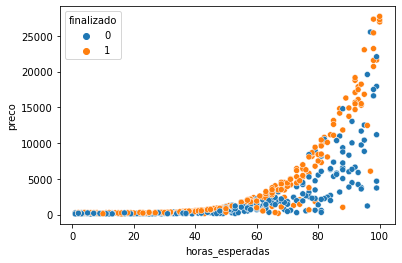

In [24]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y, data=teste_x);

Estamos passando um conjunto de dados para analisar as duas colunas, mas a cor está de acordo com outro conjunto. O scatterplot() suporta esse tipo de função. 

Repare que, aparentemente, estamos seguindo o mesmo padrão de treino e teste. Então o que há de errado com o nosso teste?

Quando estamos trabalhando com duas dimensões (e somente nesses casos), podemos colorir todos os pixels do gráfico de acordo com as possíveis previsões do classificador que criamos. Por exemplo, será ou não vendido um projeto na faixa de valor 25000 com tempo de construção de 60h?

O algoritmo deve ser capaz de aprender a curva ascendente que vemos no gráfico: quanto mais bem pago e com maior tempo de elaboração, maior chance do projeto ser de fato concluído.

Existem diversas maneiras de realizarmos esse procedimento, mas são maneiras de trabalhar com matrizes e que não necessariamente serão executadas explicitamente no nosso dia-a-dia. Como estamos em um caso bastante específico, iremos abordá-las apenas com duas dimensões, já que nos ajudarão a compreender com clareza qual é o problema do nosso algoritmo.

Do conjunto teste_x, coletaremos o valor mínimo (min()) para horas_esperadas, e atribuiremos o nome x_min a esse valor. Faremos um procedimento similar para x_max, mas dessa vez coletando o valor máximo. Repetiremos essa estrutura para teste_y, mas agora trabalhando com preco mínimo e máximo. Por fim, imprimiremos o resultado.

In [25]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()
print(x_min, x_max,y_min,y_max)

1 100 101 27738


Na tela, teremos quatro valores - respectivamente, os mínimos e máximos de x e y.

    1 100 101 27738

O x está indo de 1 a 100, enquanto y varia de 101 a 27738. Agora definiremos quantos pixels haverá em cada dimensão; se multiplicamos 100 x 100, isto é, 100 pixels para cada dimensão (altura e largura), teremos um total de 10.000 pontos, o que é o suficiente.

Entre x_min e x_max, cada espaço terá o tamanho máximo do gráfico dividido pelo total de pixels ((x_max - x_min)/pixels.

Por fim, adicionaremos o método arange() da biblioteca do Numpy.

In [27]:
pixels = 100
np.arange(x_min, x_max, (x_max - x_min) / pixels)

array([ 1.  ,  1.99,  2.98,  3.97,  4.96,  5.95,  6.94,  7.93,  8.92,
        9.91, 10.9 , 11.89, 12.88, 13.87, 14.86, 15.85, 16.84, 17.83,
       18.82, 19.81, 20.8 , 21.79, 22.78, 23.77, 24.76, 25.75, 26.74,
       27.73, 28.72, 29.71, 30.7 , 31.69, 32.68, 33.67, 34.66, 35.65,
       36.64, 37.63, 38.62, 39.61, 40.6 , 41.59, 42.58, 43.57, 44.56,
       45.55, 46.54, 47.53, 48.52, 49.51, 50.5 , 51.49, 52.48, 53.47,
       54.46, 55.45, 56.44, 57.43, 58.42, 59.41, 60.4 , 61.39, 62.38,
       63.37, 64.36, 65.35, 66.34, 67.33, 68.32, 69.31, 70.3 , 71.29,
       72.28, 73.27, 74.26, 75.25, 76.24, 77.23, 78.22, 79.21, 80.2 ,
       81.19, 82.18, 83.17, 84.16, 85.15, 86.14, 87.13, 88.12, 89.11,
       90.1 , 91.09, 92.08, 93.07, 94.06, 95.05, 96.04, 97.03, 98.02,
       99.01])

A partir de 1, foram realizadas somas de 0.99 até chegar ao número 99.01, dividindo proporcionalmente o espaço do eixo_x no gráfico. Faremos o mesmo procedimento para o eixo_y, aproveitando para nomear cada uma dessas operações:

In [28]:
pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min)/ pixels)

Agora a ideia é criarmos um grid entre os dois eixos, multiplicando as opções de acordo com as diferentes possibilidades de custo de projeto e tempo de execução. Temos na biblioteca do Numpy o np.meshgrid(), que consegue mesclar um grid . Esse método receberá como parâmetros o eixo_x e eixo_y, e devolverá o conteúdo que assinalaremos como xx e yy. Vamos analisar xx: 

In [29]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx

array([[ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       ...,
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01],
       [ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01]])

Com o código estruturado desta maneira, o que temos é a repetição do eixo x 100 vezes, e o mesmo ocorre com eixo y. Ou seja, ainda não mesclamos realmente esses dados. Para fazermos isso, usaremos o xx.ravel(): 

In [30]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
xx.ravel()

array([ 1.  ,  1.99,  2.98, ..., 97.03, 98.02, 99.01])

Faremos o mesmo procedimento para yy, e então concatenaremos xx e yy por meio de np.c_. Essa operação nos devolverá os pontos.

Ao executarmos o código veremos a concatenação, com os devidos pares em cada eixo. 

In [32]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.010000e+02],
       [1.990000e+00, 1.010000e+02],
       [2.980000e+00, 1.010000e+02],
       ...,
       [9.703000e+01, 2.746163e+04],
       [9.802000e+01, 2.746163e+04],
       [9.901000e+01, 2.746163e+04]])

Agora, nosso trabalho é, a partir do modelo, fazer as previsões (predict() para todos esses pontos. Como resultado, teremos uma série de números, que são as classificações. Chamaremos essas classificações de Z.

In [33]:
Z = modelo.predict(pontos)

Precisamos nos atentar para o formato (shape) do array, que é 10000, mas se analisarmos xx, verificaremos que suas dimensões são 100, 100: 

In [34]:
Z.shape

(10000,)

In [35]:
xx.shape

(100, 100)

Precisamos redimensionar (reshape) o array de 10000 de acordo com xx.

In [36]:
Z = Z.reshape(xx.shape)
Z

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int64)

Finalmente, poderemos plotar esses dados. Para isso, usaremos a biblioteca Matplotlib, cujas importações costumam ser plt. Novamente, queremos que os pontos sejam espalhados (scatter()), mas não usaremos o scatterplot() do Seaborn pois, nesse caso, queremos um controle mais refinado dessa plotagem.

O método scatter() deverá receber teste_x.horas_esperadas e teste_x.preco. Em seguida, definiremos a cor por meio do argumento c = recebendo teste_y. 

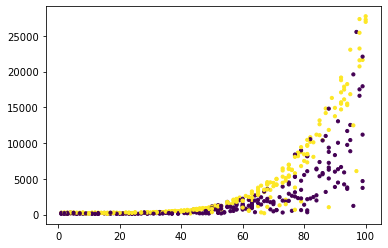

In [43]:
import matplotlib.pyplot as plt

plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s = 10);

Já temos o plot básico, nossa próxima tarefa é desenhar a classificação que estipulamos: se o valor for 0, pintaremos de uma cor, se for 1, de outra. Além disso, entre esses números, adicionaremos uma cor diferente para que possamos visualizar a curva que separa as duas classificações do algoritmo.

Para tanto, usaremos plt.contourf() (de countor, ou "contorno"), que receberá xx, yy e Z. Para que a tonalidade não seja muito forte, escreveremos alpha=0.3, aumentando a transparência.

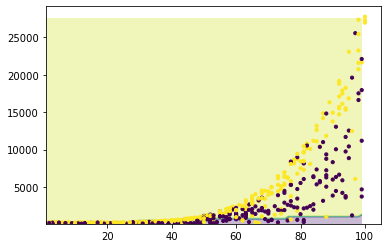

In [45]:
plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c = teste_y, s = 10)

Perceba que a curva de decisão do algoritmo quase não é visível, o que quer dizer que os palpites para a finalização do projeto estão enviesados.

Nós poderíamos obter um novo resultado executando novamente o código com alterações no SEED (a variância de ordenação randômica), mas ainda assim teríamos um resultado nada satisfatório. No caso abaixo, por exemplo (SEED = 5), a curva de decisão (decision boundary) mostra que todos os projetos receberam a classificação 0.

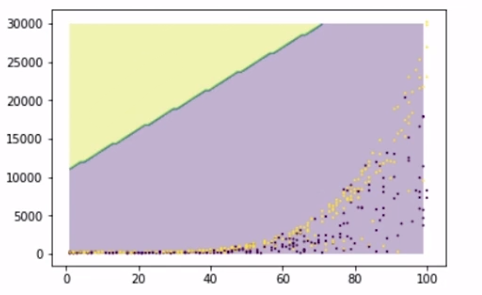

Precisamos de algum modelo estimador que seja capaz de aprender um padrão mais inteligente. O algoritmo que estamos utilizando só é capaz de aprender uma linha reta, que não serve para classificação. É isso que faremos com algumas alterações no projeto!

Com o algoritmo do estimador LinearSVC, fomos capazes de encontrar uma borda de decisão na forma de linha. Esse estimador, que tentou modelar os nossos dados, é capaz de encontrar relacionamentos lineares entre as informações que passamos, mas nada além disso. Reparando nos nossos dados, percebemos que o relacionamento entre os projetos finalizados ou não parece ser melhor representado por uma curva, e não uma reta.

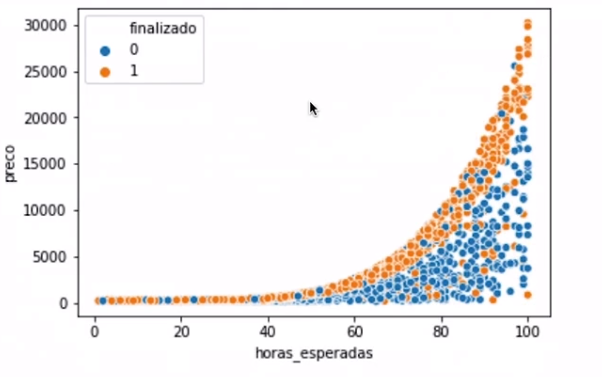

Tendo isso em vista, precisamos de outro estimador. Se consultarmos a documentação do Sklearn sobre o LinearSVC, que é um dos estimadores possíveis, encontraremos a informação de que existem diversos parâmetros que podem ser passados para ele.

    class sklearn.svm.LinearSVC(penalty=’l2’, loss=’squared_hinge’, dual=True, tol=0.0001, C=1.0, multi_class=’ovr’, fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)[source]

Temos, por exemplo, o random_state = None, o que significa que utilizar a aleatoriedade para encontrar a melhor reta representativa para nossos dados. Dessa forma, se executarmos duas vezes nosso código, podemos ter resultados diferentes de acurácia mantendo o mesmo valor de SEED, por exemplo, ora 47.41%, ora 53.0%.

Isso ocorre porque estamos passando o SEED apenas para train_test_split(), e mantendo, sem saber, a aleatoriedade do LinearSVC. Isso significa também que não conseguiremos replicar os resultados.

Uma alternativa é passarmos o random_state=SEED para nosso modelo LinearSVC(). Assim, os resultados se manterão toda vez que rodarmos o algoritmo.


In [46]:
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(random_state = SEED)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 47.41%


C:\Users\Resource\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Para não termos de passar todas as vezes o argumento random_state, aprenderemos um outro recurso do Sklearn. As bibliotecas dessa natureza usam o random_state com o valor None por padrão. Analisando a documentação de muitas dessas bibliotecas, aprenderemos que, quando o valor de random_state é None, o np.random do Numpy é utilizado.

Portanto, se configurarmos np.random.seed() como SEED, não precisamos mais passá-lo para train_test_split() ou para LinearSVC(), pois estamos utilizando o Numpy de forma fixa.

Ao executarmos o código, a acurácia se fixará em 60.0%, e nossa curva de decisão será, em relação a nossa baseline, 8% melhor. Porém, isso aconteceu simplesmente por sorte.

In [51]:
SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = LinearSVC(max_iter=1000000)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 60.00%


C:\Users\Resource\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Quando a biblioteca utiliza o Numpy como parâmetro do random_state, podemos simplesmente passar o SEED com np.random.seed(). Porém, se estivermos utilizando outras maneiras de gerar números aleatórios, teremos que tomar algumas precauções.

No módulo sklearn.smv, teremos diversas variações de algoritmos baseados em uma única ideia: Suport Vector Machines, isto é, SVM. Estávamos utilizando anteriormente o LinearSVC, ou Suport Vector Classification, que é baseado em relacionamentos lineares.

Queremos utilizar um algoritmo mais independente e que encontre relacionamentos diferentes, portanto tentaremos o SVC. Um dos seus parâmetros, inclusive, é o random_state, como podemos verificar na documentação.

In [53]:
from sklearn.svm import SVC

SEED = 5
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 55.19%


Ou seja, um resultado de 55.19%, inferior ao que obtivemos usando LinearSVC. O que pode ter acontecido? Vamos descobrir qual tipo de relacionamento foi realizado pelo SVC. Plotaremos novamente, aproveitando a estrutura de código que já utilizamos para formação de pontos e assim por diante: 

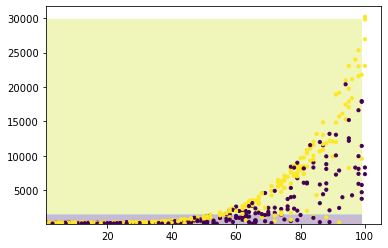

In [55]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s=10)

# DECISION BOUNDARY

Analisando a plotagem, percebemos que de fato foram realizados relacionamentos não lineares. Há pequenos agrupamentos de cor diferente que representam as previsões do algoritmo para projetos que terão valor 1, e o restante será 0. Não estamos tendo um palpite muito inteligente.

Isso o ocorre devido a discrepância entre os eixos: em X, teremos valores de 0 a 100, e em Y de 0 a 30000. Esses algoritmos são muito suscetíveis à escala, e darão menos valor para variações menores, como é o caso de X.

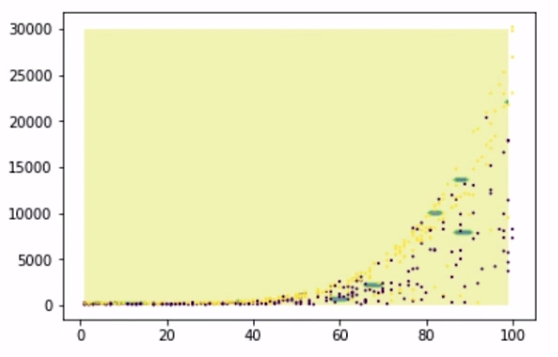

Escalas distintas em features causam um desbalanço no algoritmo. Uma alternativa para solucionarmos esse problema é reescalarmos todo o nosso projeto para uma faixa similar. Faremos isso utilizando o escalador padrão do Sklearn, o standardscaler, que é uma fase de pré-processamento e padronização de valores.

Primeiramente importaremos este recurso (from sklearn.preprocessing import StandardScaler), e então faremos suaves alterações no código que já utilizamos anteriormente.

Queremos elaborar uma nova escala a partir dos valores de X para treino. Para tanto, criaremos um StandardScaler(), que será atribuído à uma variável scaler, e treinaremos esse processo baseado em treino_x. Em seguida, transformaremos treino_x em um novo treino_x que já está na nova escala. Em seguida, repetiremos o processo para teste_x.

Desse modo, todas as features serão utilizadas para treinar o processo de escala, e por fim, atualizadas de acordo com as novas medidas. Já sabemos que não é uma boa prática sobrescrever variáveis, pois podemos nos perder em meio às nomeclaturas. Portanto, renomearemos os dados "crus" (os originais) adicionando o termo raw - ou seja, raw_treino_x e raw_teste_x. 

In [56]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                         stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi 66.85%


Ao executarmos esse código, estaremos treinando o StandardScaler() com as nossas faixas de dados originais. Em seguida, esses conjuntos são reescalados, gerando um novo treino_x e um novo teste_x. Como resultado, nosso algoritmo retornará:

    Treinaremos com 1617 elementos e testaremos com 540 elementos

    A acurácia foi 66.85%

Tivemos uma taxa de acerto ainda melhor que a do LinearSVC(), mas ainda precisamos visualizar isso em um gráfico:

In [57]:
x_min = teste_x.horas_esperadas.min()
x_max = teste_x.horas_esperadas.max()
y_min = teste_x.preco.min()
y_max = teste_x.preco.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(teste_x.horas_esperadas, teste_x.preco, c=teste_y, s = 1)

# DECISION BOUNDARY

AttributeError: 'numpy.ndarray' object has no attribute 'horas_esperadas'

Ao tentarmos executá-lo, teremos a seguinte mensagem de erro:

    AttributeError: 'numpy.ndarray' object has no attribute 'horas_esperadas'

Isso aconteceu porque nossas novas variáveis teste_x e treino_x são arrays de arrays (que, na nova escala, só possuem dois valores). 

In [58]:
treino_x

array([[-1.20810685, -0.58850785],
       [-0.25992095, -0.48069545],
       [ 1.46086087,  0.13548927],
       ...,
       [-0.57598292, -0.58492075],
       [ 1.21503489,  0.45294796],
       [ 1.1799169 ,  1.18670998]])

Antes, essas variáveis (agora representadas por raw_teste_x e raw_treino_x) representavam dataframes do Pandas e continham as informações horas_esperadas e preco, que não funcionam mais para nossa plotagem.

Para obtermos a primeira coluna desse array do Numpy (equivalente a horas_esperadas), usaremos teste_x[:,0] - ou seja, todas as linhas e a coluna 0 do array teste_x. Como esse será nosso eixo X, atribuiremos o resultado a uma variável data_x.

Repetiremos o processo para a criação de data_y, pegando todas as linhas da coluna 1 desse array: 

In [59]:
data_x = teste_x[:,0]
data_y = teste_x[:,1]

Em seguida, alteraremos o código de plotagem de acordo com as novas nomeações: 

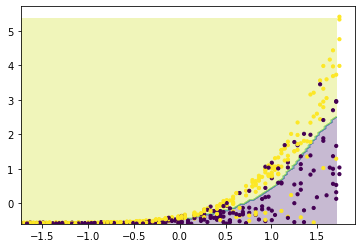

In [61]:
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

Z = modelo.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha = 0.3)
plt.scatter(data_x, data_y, c = teste_y, s = 10);

Por mais que LinearSVC tenha tido uma taxa razoável de 60.00%, a linha de decisão na plotagem foi horrível. Na prática, utilizar o SVC parece ser uma decisão melhor: temos uma curva de decisão bem marcada e o estimador possui uma taxa de acerto um pouco maior, de 66.85%.

Aprendemos que existem diversos estimadores, os dois que utilizamos até agora são baseados em um algoritmo chamado Suport Vector Machine. Um deles possui uma restrição e consegue apenas estabelecer relacionamentos lineares, e o outro é capaz de elaborar curvas e atinge uma taxa de acurácia mais interessante no caso do nosso projeto.

Por fim, você ainda pode explorar o SKLearn e encontrar outros estimadores para trabalhar, dentro e fora do SVM. A seguir, começaremos a estudar mais um desses estimadores.